In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data


mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(clinical_data,mouse_data,on='Mouse ID',how='left')


# Display the data table for preview
complete_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_tumor = complete_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
tumor_avg = group_tumor.mean()
# Convert to DataFrame
tumor_avg = tumor_avg.reset_index()
# Preview DataFrame
tumor_avg.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [21]:

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = group_tumor.sem()
# Convert to DataFrame
tumor_error =pd.DataFrame(tumor_error)
# Preview DataFrame
tumor_error= tumor_error.reset_index
tumor_error

<bound method DataFrame.reset_index of                      Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
 

In [22]:
# Minor Data Munging to Re-Format the Data Frames
tumor_avg= tumor_avg.reset_index()
tumor_pivot_avg= tumor_avg.pivot(index="Timepoint", columns="Drug",values= "Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_pivot_avg.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


<function matplotlib.pyplot.savefig(*args, **kwargs)>

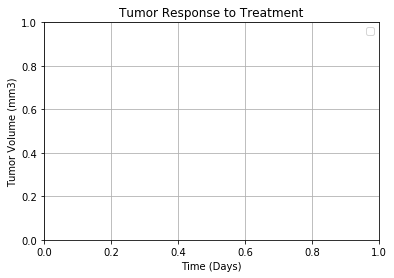

In [23]:
# Generate the Plot (with Error Bars)
plot_errors= ['Capomulin','Infubinol','Ketapril','Placebo']
marker = ['o','D','^','s']
colors = ['blue','red','green','orange']
plot_symbols = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

#for drug in plot_errors:
    #tumor_treatment[plt.errorbar(tumor_pivot_avg.index,tumor_pivot_avg(drug),
                                      # fmt=marker,color=colors)]
counter = 0


plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
# Save the Figure
plt.savefig


In [24]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [25]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met = complete_data.groupby(['Drug','Timepoint'])['Metastatic Sites']
met_avg = met.mean()
# Convert to DataFrame
met_avg = met_avg.reset_index()
# Preview DataFrame
met_avg.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error=met.sem()
# Convert to DataFrame
met_error= pd.DataFrame(met_error)
# Preview DataFrame
met_error.reset_index
met_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [27]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot=met_avg.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


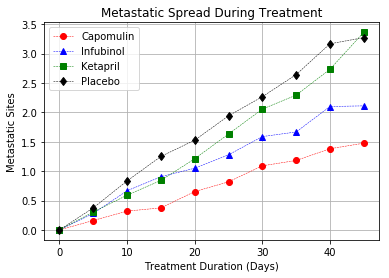

In [28]:
# Generate the Plot (with Error Bars)
plot_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in plot_list:
    #ste = met_error[drug]
    met_plot = plt.errorbar(met_pivot.index,met_pivot[drug],
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
# Save the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.grid()
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_survival_group= complete_data.groupby(['Drug','Timepoint']).count()['Mouse ID']
#mice_count=mice_survival_group.unique()
# Convert to DataFrame
#mice_count.reset_index
#mice_count=mice_count.rename(columns={'Mouse ID':'Mouse_Count'})
mice_survival_groupt = pd.DataFrame({"Mouse Count": mice_survival_group})
# Preview DataFrame
mice_survival_groupt.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_groupt = mice_survival_groupt.reset_index()
mice_survival_groupt_pivot = mice_survival_groupt.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mice_survival_groupt_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


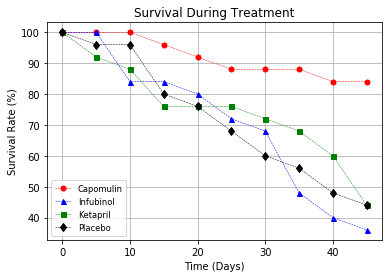

In [35]:
plt.plot(100 * mice_survival_groupt_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_survival_groupt_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_survival_groupt_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_survival_groupt_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
#plt.savefig

# Show the Figure
plt.show()

In [ ]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in plot_list:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_rate = (mice_count_pivot[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_count_mouse_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

# Save the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
percent_change = (tumor_pivot_avg.iloc[-1]/(tumor_pivot_avg.iloc[0])-1)*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)